<a href="https://colab.research.google.com/github/noayarae/ARIMA/blob/main/MA_shapoo_sales_by_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MA model computed in python and verified by hand

In this code, I run the model to predict three values. These prediction were computed by hand in excel too.

The excel file is uploaded in this folder

<ipython-input-24-73aa368f2c5d>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


[] [0.34088944]
[ -27.45969338 -139.17349698  -63.48401535 -152.54868156  -61.16583983
 -104.10929506  -26.17001145  -60.03861512  -80.19316417 -143.22269074
   91.86340928 -138.87495942  -51.81868639 -126.29525046  -40.30697632
   -6.41947084  -99.87136357   27.5853997   -76.86326481   36.34218183
  -15.94835935  133.57693389  -74.49465942   74.23474927   20.9344646
  139.80396873  -25.21738983  154.43664849   55.19448417  125.12508988
  239.38648494   32.53598209  377.44913394]
Intercept: 293.459693382878   MA.coeff: 0.34088943886108697   Sigma2: 13699.092589614245
------->  predicted = 422.128117, expected = 475.300000
--------------------------------------------------------------------------------------
[] [0.36245506]
[ -29.05300817 -139.84537606  -62.02696249 -153.31531319  -59.19747534
 -105.09731281  -25.16012505  -61.43359879  -79.98609091 -143.16164477
   93.33665487 -142.98335137  -48.92796841 -127.81881825  -38.62443023
   -7.75338784 -100.84275349   28.49795849  -79.382237

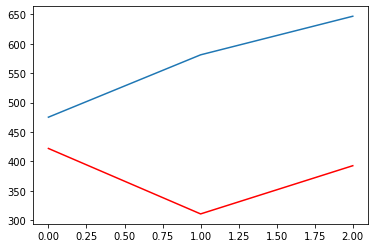

In [24]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
def colored(r, g, b, text):
    return f"\033[38;2;{r};{g};{b}m{text}\033[0m"

series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = 33 # int(len(X) * 0.66)  #  <-----------  SIZE
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
  #model = ARIMA(history, order=(5,1,0))
  model = ARIMA(history, order=(0,0,1))
  model_fit = model.fit()
  print(model_fit.arparams, model_fit.maparams)
  print(model_fit.resid)
  #print(model_fit.params[0])
  print(colored(0, 0, 255, ("Intercept: "+ str(model_fit.params[0])+"   MA.coeff: "+ str(model_fit.params[1])+"   Sigma2: "+ str(model_fit.params[2]))))
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('------->  predicted = %f, expected = %f' % (yhat, obs))
  print('--------------------------------------------------------------------------------------')

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [4]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   35
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -217.994
Date:                Tue, 07 Mar 2023   AIC                            441.987
Time:                        18:19:15   BIC                            446.653
Sample:                             0   HQIC                           443.598
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.8276     35.888      8.466      0.000     233.488     374.168
ma.L1          0.3398      0.268      1.266      0.206      -0.186       0.866
sigma2      1.499e+04   3899.183      3.844      0.0